### Probablistic modeling on Banknotes dataset. 
#### To predict either the Note is Original or Fake

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('banknotes.csv')
data.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
data.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [ ]:
data.Class.unique()

array([0, 1])

In [ ]:
data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
data.shape

(1372, 5)

In [ ]:
X = data.iloc[:,0:4]
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y = data.iloc[:,4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
model.predict([[1.2,8.6661,-2.8073,-0.44699]])

array([0])

In [ ]:
model.score(X_test,y_test)*100

97.0909090909091

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[153,   2],
       [  6, 114]])

In [ ]:
# for criterian entropy
model.score(X_test,y_test)*100

97.45454545454545

In [ ]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.76
|   |--- feature_1 <= 5.16
|   |   |--- feature_0 <= 0.32
|   |   |   |--- feature_2 <= 6.22
|   |   |   |   |--- feature_1 <= 4.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  4.08
|   |   |   |   |   |--- feature_1 <= 4.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  4.16
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  6.22
|   |   |   |   |--- feature_1 <= -3.26
|   |   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -0.36
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -3.26
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.32
|   |   |   |--- feature_2 <= 0.47
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.47
|   |   |   |   |--- feature_3 <= 0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.83
|   |   |   |   |   |--- class: 1
|   |--- feature_1 >

In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

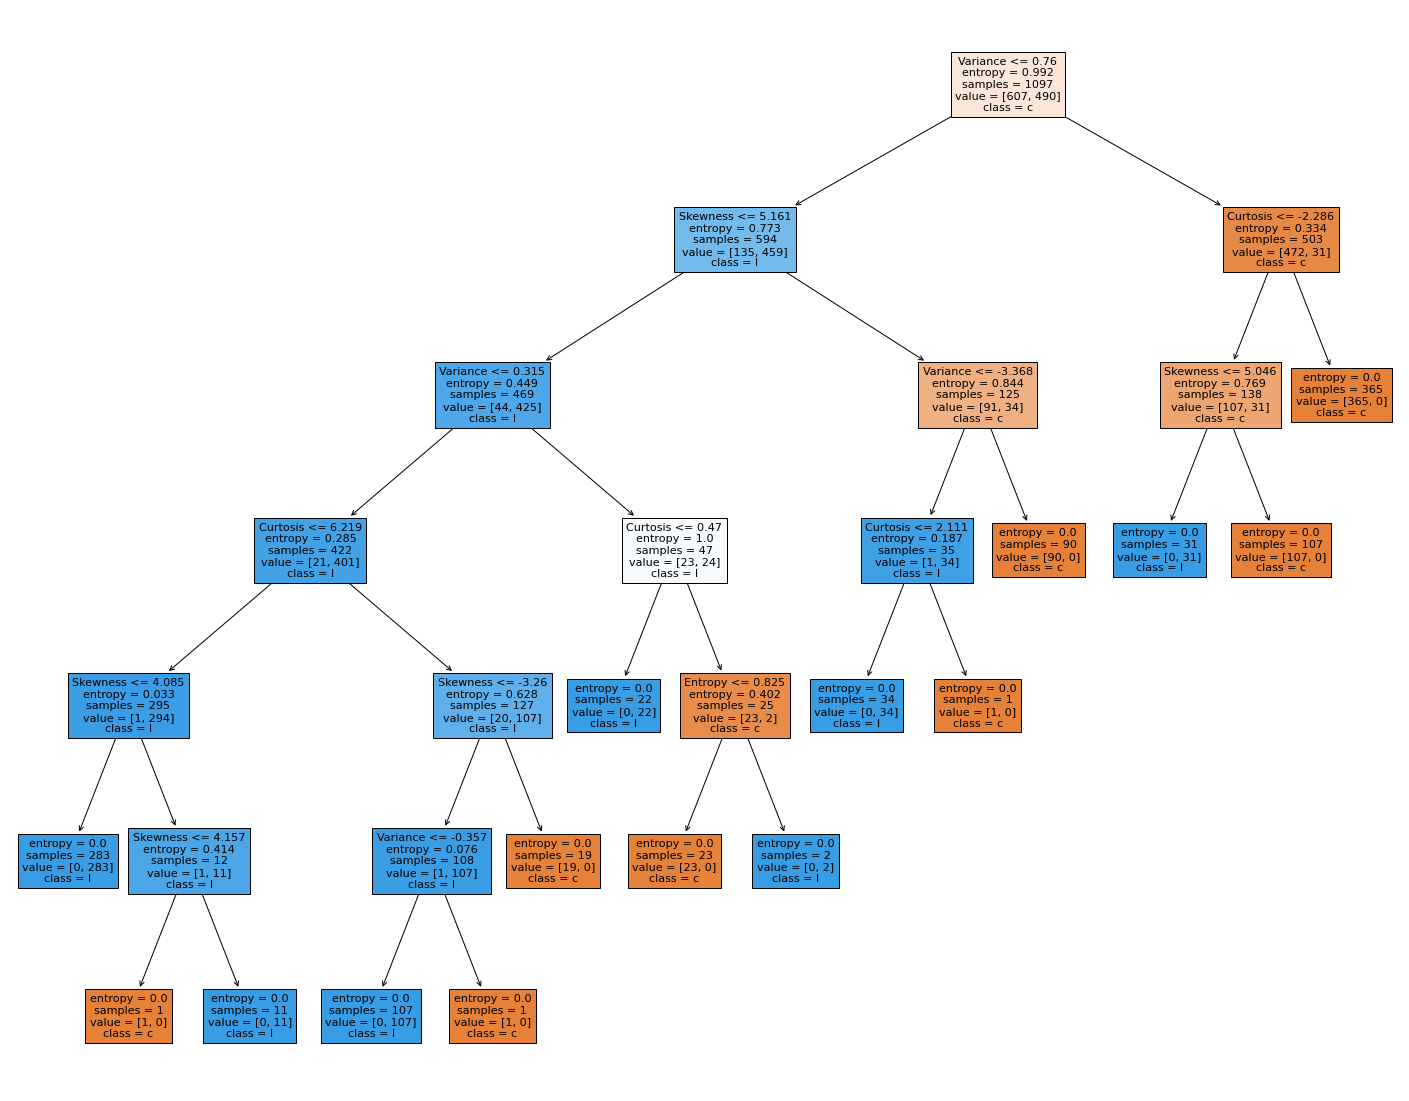

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=data.columns,  
                   class_names='class',
                   filled=True)

In [ ]:
data[data.Variance <= .76].__len__()

743

In [ ]:
607+490

1097

In [ ]:
X_train.shape

(1097, 4)

In [ ]:
X_train[X_train.Variance <= .76]

,Variance,Skewness,Curtosis,Entropy
996,-2.314200,2.0838,-0.46813,-1.67670
726,0.040498,8.5234,1.44610,-3.93060
970,-2.329900,-9.9532,8.47560,-1.87330
862,-1.242400,-1.7175,-0.52553,-0.21036
764,-1.667700,-7.1535,7.89290,0.96765
...,...,...,...,...
1074,-0.419650,2.9094,-1.78590,-2.20690
1267,-2.455400,-9.0407,8.86200,-0.86983
858,0.259430,5.0097,-5.03940,-6.38620
1000,-2.882900,3.8964,-0.18880,-1.16720
